In [217]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [218]:
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [219]:
stop_words = set(stopwords.words('english'))

In [220]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [221]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [222]:
tweetdf = pd.read_csv(r"C:\Users\athik\OneDrive\Documents\personal\projects\tweet\train.csv\train.csv")

In [224]:
class_labels = {0:"Non hate", 1:"Hate"}
class_labels

{0: 'Non hate', 1: 'Hate'}

In [223]:
tweetdf.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [225]:
tweetdf.shape

(31962, 3)

In [226]:
tweetdf.describe().T

,count,mean,std,min,25%,50%,75%,max
id,31962.0,15981.500000,9226.778988,1.0,7991.25,15981.5,23971.75,31962.0
label,31962.0,0.070146,0.255397,0.0,0.00,0.0,0.00,1.0


In [227]:
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [228]:
tweetdf.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [229]:
tweetdf['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

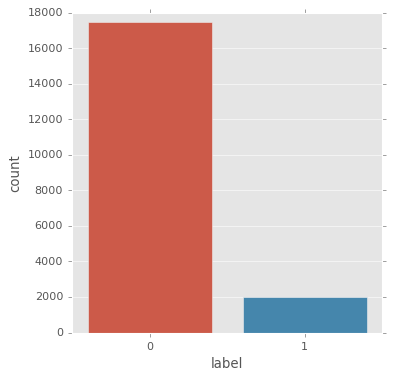

In [230]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

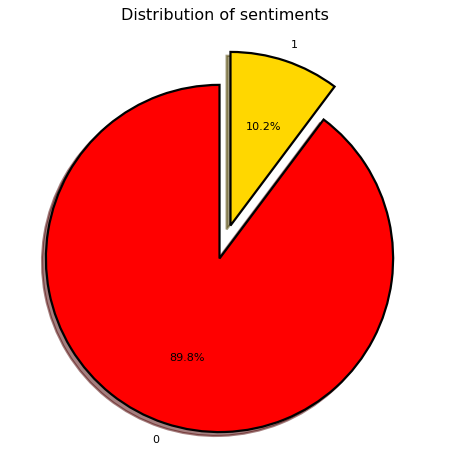

In [231]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [232]:
no_sample = max(tweetdf['label'].value_counts())

tweet_df = tweetdf.groupby( "label", as_index=False, group_keys=False).apply(lambda s: s.sample(no_sample,replace=True))

In [233]:
tweet_df['label'].value_counts()

0    29720
1    29720
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

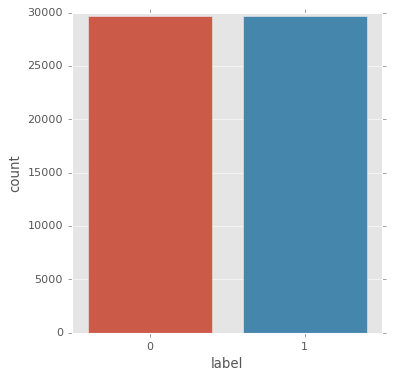

In [234]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

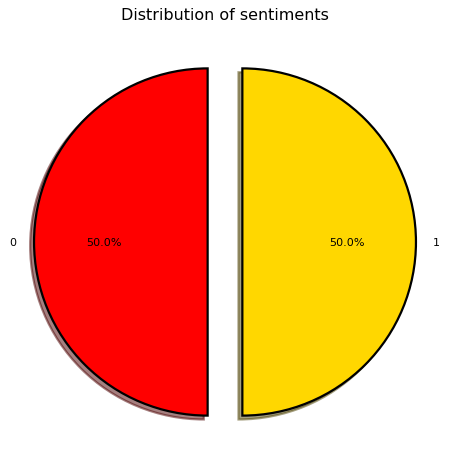

In [235]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [236]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user do more of what makes you happy!    #87   #motivation #takecontrol #onelife  

cute metal dragonfly for $19.95 from vendor 29!! #dragonfly #homedecor #upsideofflorida   #shopalyssas  

 @user #sharethelove .@user thank you! .@user thank you 4 the likes &amp;  .@user #followback   htâ¦ 

wow, wow, wow. my create a plan for your life workshop was amazing!  #clarity #plan #motivation   

nove :) #flylondon #friends   #sunglasses #love  



In [237]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [238]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [239]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\athik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [240]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [241]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [242]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [243]:
#nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\athik\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [244]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user makes happy 87 motivation takecontrol onelife 

cute metal dragonfly 1995 vendor 29 dragonfly homedecor upsideofflorida shopalyssas 

user sharethelove user thank user thank 4 likes amp user followback htâ 

wow wow wow create plan life workshop amazing clarity plan motivation 

nove flylondon friends sunglasses love 



In [246]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet
20502,20503,0,user makes happy 87 motivation takecontrol one...
25864,25865,0,cute metal dragonfly 1995 vendor 29 dragonfly ...
26430,26431,0,user sharethelove user thank user thank 4 like...
28733,28734,0,wow wow wow create plan life workshop amazing ...
21982,21983,0,nove flylondon friends sunglasses love


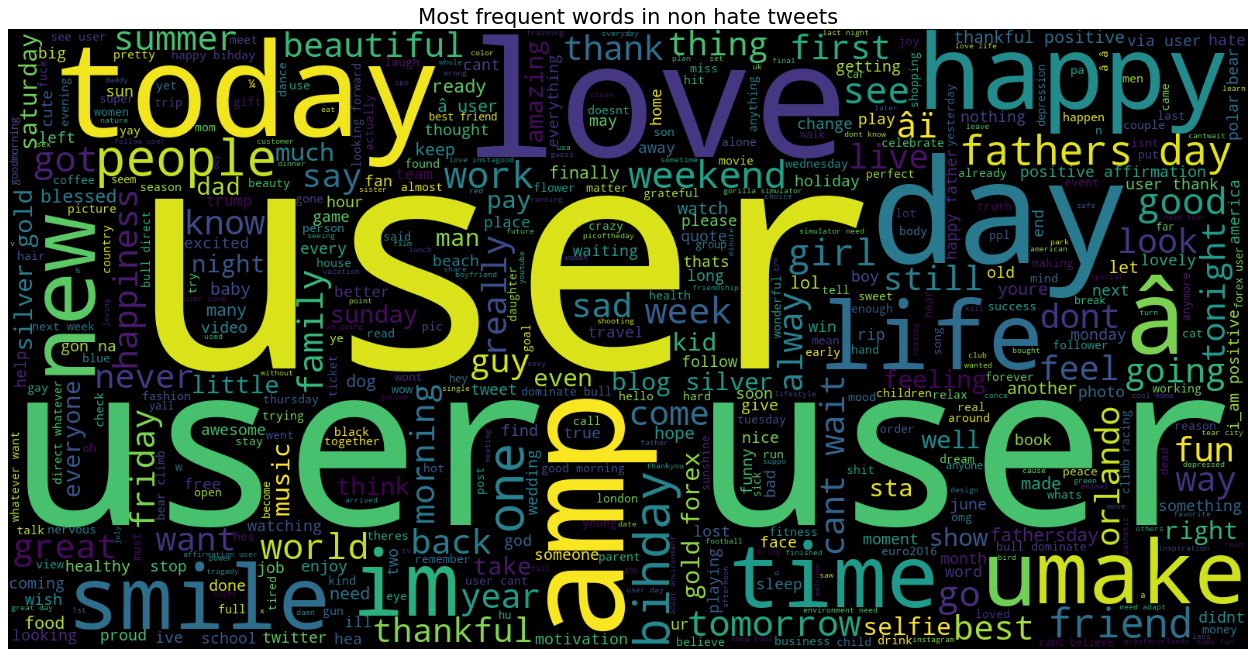

In [247]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [248]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,id,label,tweet
17708,17709,1,user feminismiscancer feminismisterrorism femi...
27520,27521,1,hispanic amp feel like stomping listen retweet...
6067,6068,1,liberal believes pay inclusivity believes equa...
354,355,1,might libtard libtard sjw liberal politics
1446,1447,1,user need different word altogether defines ha...


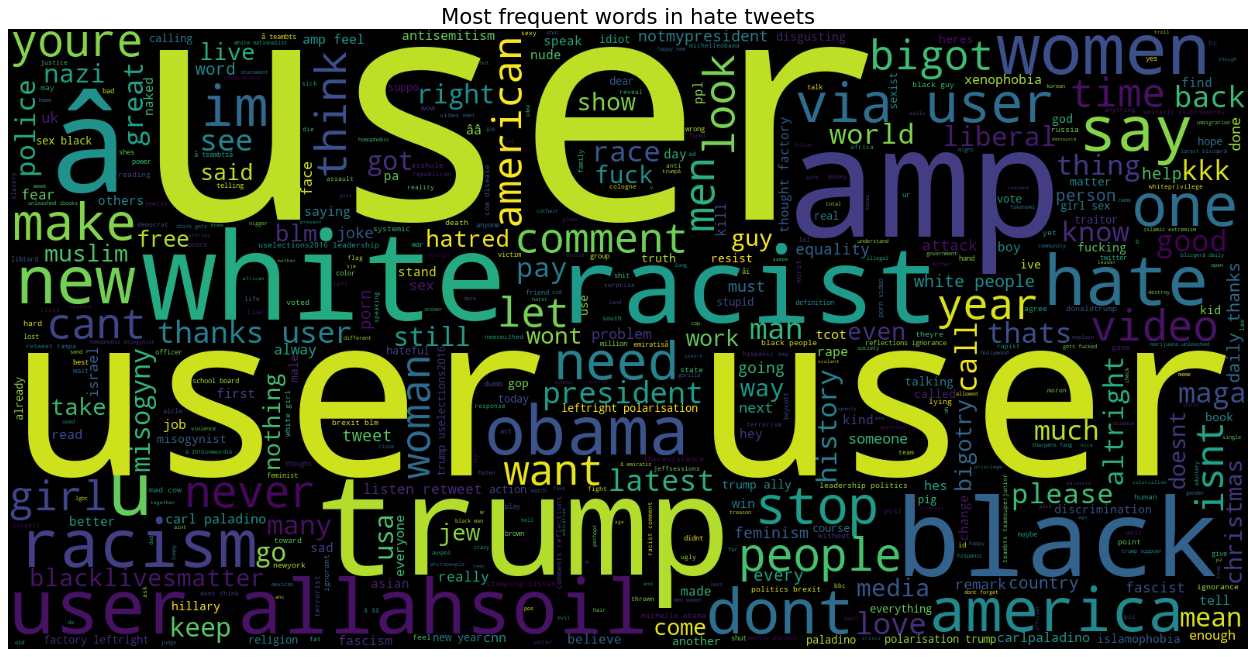

In [249]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [250]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [251]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 148536

First 20 features: 
['0000001', '0000001 polluting', '00027', '00027 photooftheday', '001', '0035', '01', '01 4995', '01 7900', '01 blog', '01 croatia', '01 may', '0115', '0115 8599968', '01926889917', '02', '02 05', '02 academy', '02 may', '02 mm']


In [252]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [253]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 265394

First 20 features: 
['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '01', '01 4995', '01 4995 rustic', '01 7900', '01 7900 shopalyssas', '01 blog', '01 blog silver', '01 croatia', '01 croatia happy', '01 may', '01 may previous', '0115']


In [254]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [255]:
X

<19508x265394 sparse matrix of type '<class 'numpy.float64'>'
	with 433451 stored elements in Compressed Sparse Row format>

In [256]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [257]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (15606, 265394)
Size of y_train: (15606,)
Size of x_test:  (3902, 265394)
Size of y_test:  (3902,)


In [258]:
x_test

<3902x265394 sparse matrix of type '<class 'numpy.float64'>'
	with 86303 stored elements in Compressed Sparse Row format>

In [259]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 90.36%


In [260]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[3512    0]
 [ 376   14]]


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3512
           1       1.00      0.04      0.07       390

    accuracy                           0.90      3902
   macro avg       0.95      0.52      0.51      3902
weighted avg       0.91      0.90      0.86      3902



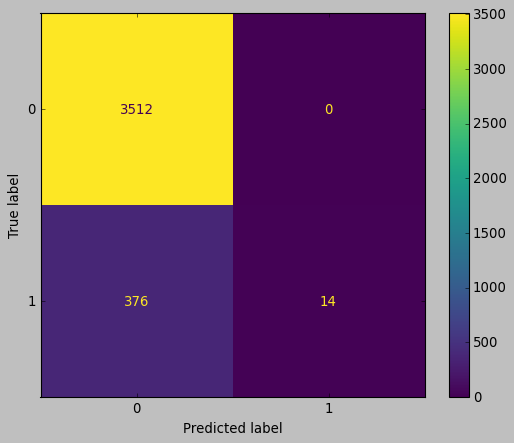

In [261]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()


In [262]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [265]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.93
Best parameters:  {'C': 100, 'solver': 'lbfgs'}


In [268]:
y_pred = grid.predict(x_test)

In [269]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.21%


In [270]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[3498   14]
 [ 251  139]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3512
           1       0.91      0.36      0.51       390

    accuracy                           0.93      3902
   macro avg       0.92      0.68      0.74      3902
weighted avg       0.93      0.93      0.92      3902



In [285]:
non_hated_txt='factsguide society motivation'
text=vect.transform([non_hated_txt])
class_labels[logreg.predict(text)[0]]

'Non hate'

In [287]:
hated_txt='dear theresamay brexit amp lies remainers never unite leavers shit christmas lady'
text=vect.transform([hated_txt])
class_labels[logreg.predict(text)[0]]

'Hate'